<a href="https://colab.research.google.com/github/Rajora0/ML_SYS_RECOMENDACAO/blob/main/ML_intro_a_sistemas_de_recomenda%C3%A7%C3%A3o_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: intro a sistemas de recomendação em Python

---


https://files.grouplens.org/datasets/movielens/ml-latest.zip

## Montar Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive/')

!ls '/gdrive/MyDrive/ML_SYS_RECOMENDACAO/Dados/'

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).
ml_latest  ml-latest.zip


## ETL

In [ ]:
#!wget https://files.grouplens.org/datasets/movielens/ml-latest.zip -O /gdrive/MyDrive/ML_SYS_RECOMENDACAO/Dados/ml-latest.zip

In [ ]:
#!mkdir /gdrive/MyDrive/ML_SYS_RECOMENDACAO/Dados/ml_latest

In [ ]:
#!unzip -j /gdrive/MyDrive/ML_SYS_RECOMENDACAO/Dados/ml-latest.zip -d /gdrive/MyDrive/ML_SYS_RECOMENDACAO/Dados/ml_latest

## Carregando os dados

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path = '/gdrive/MyDrive/ML_SYS_RECOMENDACAO/Dados/ml_latest/'

In [ ]:
movies = pd.read_csv(path+'movies.csv', sep = ',', na_filter = False)
movies = movies.set_index("movieId")
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.shape

(9742, 2)

In [ ]:
ratings = pd.read_csv(path+'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings.shape

(100836, 4)

In [ ]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


## Primeira recomendação: o com maior numero de avaliações

In [ ]:
total_votos = ratings.movieId.value_counts()
total_votos.head()

356     329
318     317
296     307
593     279
2571    278
Name: movieId, dtype: int64

In [ ]:
movies.loc[318]

title     Shawshank Redemption, The (1994)
genres                         Crime|Drama
Name: 318, dtype: object

In [ ]:
movies['total_votos'] = total_votos
movies.head()

,title,genres,total_votos
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [ ]:
movies.sort_values('total_votos',ascending=False).head()

,title,genres,total_votos
movieId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0


## Segunda recomendação: nota média e filtragem de votos acima de 50

In [ ]:
notas_medias = ratings.groupby('movieId').mean()['rating']
notas_medias

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

In [ ]:
movies['notas_medias'] = notas_medias
movies.head()

,title,genres,total_votos,notas_medias
movieId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143
5,Father of the Bride Part II (1995),Comedy,49.0,3.071429


In [ ]:
movies.sort_values('notas_medias',ascending=False)

,title,genres,total_votos,notas_medias
movieId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
...,...,...,...,...
30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN
32160,Twentieth Century (1934),Comedy,NaN,NaN
32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN


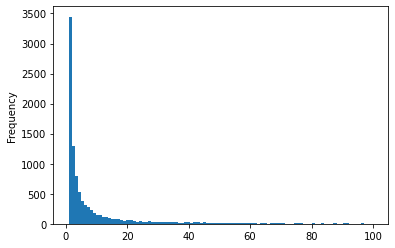

In [ ]:
movies.query('total_votos <= 100').total_votos.plot.hist(bins=100)

In [ ]:
movies.query('total_votos >= 50').sort_values('notas_medias',ascending=False)

,title,genres,total_votos,notas_medias
movieId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
...,...,...,...,...
172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53.0,2.679245
173,Judge Dredd (1995),Action|Crime|Sci-Fi,62.0,2.669355
432,City Slickers II: The Legend of Curly's Gold (...,Adventure|Comedy|Western,55.0,2.645455


## Recomendação baseada em similaridade de genero

In [ ]:
filmes_assisti = [1, 21, 19, 10, 11, 7, 2]

In [ ]:
filmes = movies.query('total_votos >= 50')

In [ ]:
filmes.loc[filmes_assisti]

,title,genres,total_votos,notas_medias
movieId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [ ]:
filmes.drop(filmes_assisti,errors='ignore').query("genres=='Adventure|Children|Fantasy'").head()

,title,genres,total_votos,notas_medias
movieId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


## Collaborative filtering x Content based filtering

- https://en.wikipedia.org/wiki/Recommender_system

### Procurar usuários "similares"

* joão deu nota 4 no filme toy story
* maria deu nota 5 no filme toy story
* paulo deu nota 3 no filme toy story
* joana deu nota 3.5 no filme toy story

x-y ==> distância

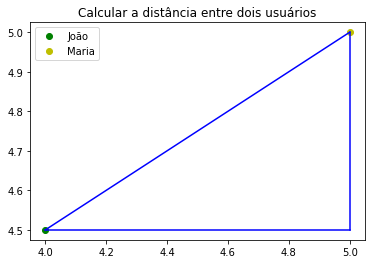

In [ ]:
import matplotlib.pyplot as plt
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.legend(["João", "Maria"])
plt.title("Calcular a distância entre dois usuários")

plt.plot([4, 5], [4.5, 4.5], color="b", linestyle="-")
plt.plot([4, 5], [4.5, 5], color="b", linestyle="-")
plt.plot([5, 5], [4.5, 5], color="b", linestyle="-")

In [ ]:
import numpy as np

joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao - maria

array([-1. , -0.5])

In [ ]:
from math import sqrt

def pitagoras(a,b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x * delta_x + delta_y * delta_y)

pitagoras(joao, maria)

1.118033988749895

In [ ]:
def pitagoras(a,b):
  return np.linalg.norm(a - b)

pitagoras(joao, maria)

1.118033988749895

Text(0.5, 1.0, 'Calcular a distância entre usuários')

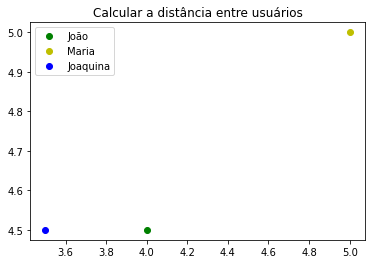

In [ ]:
import matplotlib.pyplot as plt
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.plot(3.5, 4.5, "bo")
plt.legend(["João", "Maria", "Joaquina"])
plt.title("Calcular a distância entre usuários")

In [ ]:
joaquina = np.array([3.5, 4.5])

print(pitagoras(joao, maria))
print(pitagoras(joao, joaquina))

1.118033988749895
0.5


In [ ]:
def distancia_vetor(a,b):
  return np.linalg.norm(a - b)

## Implementando a distância entre usuários no nosso dataset

In [ ]:
notas = ratings

In [ ]:
def notas_usuario(usuario):
  notas_do_usuario = notas.query("userId==%d" % usuario)
  notas_do_usuario = notas_do_usuario[['movieId','rating']].set_index('movieId')
  return notas_do_usuario

In [ ]:
notas_usuario(1)

,rating
movieId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0
...,...
3744,4.0
3793,5.0
3809,4.0


In [ ]:
usuario1 = notas_usuario(1)
usuario4 = notas_usuario(4)

In [ ]:
diferenca = usuario1.join(usuario4, lsuffix="_esquerda",rsuffix="_direita").dropna()
diferenca

,rating_esquerda,rating_direita
movieId,,
47,5.0,2.0
235,4.0,2.0
260,5.0,5.0
296,3.0,1.0
441,4.0,1.0
457,5.0,5.0
553,5.0,2.0
593,4.0,5.0
608,5.0,5.0


In [ ]:
distancia_vetor(diferenca.rating_esquerda,diferenca.rating_direita)

11.135528725660043

In [ ]:
def distancia_usuarios(usuario_id1,usuario_id2):
  notas1 = notas_usuario(usuario_id1)
  notas2 = notas_usuario(usuario_id2)
  diferenca = notas1.join(notas2, lsuffix="_esquerda",rsuffix="_direita").dropna()
  d = distancia_vetor(diferenca.rating_esquerda,diferenca.rating_direita)
  return [usuario_id1,usuario_id2,d]


In [ ]:
distancia_usuarios(1,4)

[1, 4, 11.135528725660043]

In [ ]:
def distancia_todos(voce_id):
  todos_usuarios = notas['userId'].unique()
  distancias = [distancia_usuarios(voce_id,usuario_id) for usuario_id in todos_usuarios]
  distancias = pd.DataFrame(distancias,columns=['voce','outra_pessoa','distancia'])
  return distancias

In [ ]:
distancia_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


## Ordenando usuários por distância e lidando com casos extremos

In [ ]:
def distancia_usuarios(usuario_id1,usuario_id2,minimo=5):
  notas1 = notas_usuario(usuario_id1)
  notas2 = notas_usuario(usuario_id2)

  diferenca = notas1.join(notas2, lsuffix="_esquerda",rsuffix="_direita").dropna()

  if (len(diferenca)< minimo):
    return [usuario_id1,usuario_id2,100000]
  
  d = distancia_vetor(diferenca.rating_esquerda,diferenca.rating_direita)

  return [usuario_id1,usuario_id2,d]

In [ ]:
distancia_todos(1)

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657
...,...,...,...
605,1,606,11.510864
606,1,607,9.899495
607,1,608,18.241436
608,1,609,3.162278


In [ ]:
def mais_proximo(voce_id):
  distancia = distancia_todos(voce_id)
  distancia = distancia.sort_values('distancia')
  distancia = distancia.set_index('outra_pessoa').drop(voce_id)
  return distancia


In [ ]:
mais_proximo(1)

,voce,distancia
outra_pessoa,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
523,1,1.000000
49,1,1.000000
...,...,...
190,1,100000.000000
60,1,100000.000000
576,1,100000.000000


## Gerando recomendações baseado em um usuário

In [ ]:
def distancia_usuarios(usuario_id1,usuario_id2,minimo=5):
  notas1 = notas_usuario(usuario_id1)
  notas2 = notas_usuario(usuario_id2)

  diferenca = notas1.join(notas2, lsuffix="_esquerda",rsuffix="_direita").dropna()

  if (len(diferenca)< minimo):
    return None
  
  d = distancia_vetor(diferenca.rating_esquerda,diferenca.rating_direita)

  return [usuario_id1,usuario_id2,d]

In [ ]:
def mais_proximo(voce_id, n=None):
  distancia = distancia_todos(voce_id, n)
  distancia = distancia.sort_values('distancia')
  distancia = distancia.set_index('outra_pessoa').drop(voce_id)
  return distancia

In [ ]:
def distancia_todos(voce_id, n=None):
  todos_usuarios = notas['userId'].unique()
  if n:
    todos_usuarios = todos_usuarios[:n]
  distancias = [distancia_usuarios(voce_id,usuario_id) for usuario_id in todos_usuarios]
  distancias = list(filter(None,distancias))
  distancias = pd.DataFrame(distancias,columns=['voce','outra_pessoa','distancia'])
  return distancias

In [ ]:
mais_proximo(1,50).shape

(47, 2)

In [ ]:
voce = 1

def sugere_filme(voce,n=None):

  notas_voce = notas_usuario(voce)
  filmes_viu = notas_voce.index

  similares = mais_proximo(voce,n)
  similar = similares.iloc[0].name

  notas_similar = notas_usuario(similar)
  notas_similar = notas_similar.drop(filmes_viu,errors='ignore')
  recomendacao = notas_similar.sort_values('rating',ascending=False)
  return recomendacao.join(filmes)

In [ ]:
sugere_filme(voce).head()

,rating,title,genres,total_votos,notas_medias
movieId,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,122.0,3.540984


## Finalizando uma implementação de KNN

In [ ]:
def mais_proximo(voce_id, n_mais_proximos = 10, n=None):
  distancia = distancia_todos(voce_id, n)
  distancia = distancia.sort_values('distancia')
  distancia = distancia.set_index('outra_pessoa').drop(voce_id)
  return distancia.head(n_mais_proximos)

In [ ]:
mais_proximo(1,n_mais_proximos = 2, n=300)

,voce,distancia
outra_pessoa,,
77,1,0.0
258,1,1.0


In [ ]:
def sugere_filme(voce,n_mais_proximos=10,n=None):

  notas_voce = notas_usuario(voce)
  filmes_viu = notas_voce.index

  similares = mais_proximo(voce,n_mais_proximos,n)
  usuarios_similares = similares.index

  notas_similar = notas.set_index('userId').loc[usuarios_similares]
  recomendacao = notas_similar.groupby('movieId').mean()[['rating']]
  recomendacao = recomendacao.sort_values('rating',ascending=False)

  return recomendacao.join(movies)

In [ ]:
sugere_filme(1,n_mais_proximos = 2, n=50)

,rating,title,genres,total_votos,notas_medias
movieId,,,,,
1198,5.0,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,200.0,4.207500
5481,5.0,Austin Powers in Goldmember (2002),Comedy,65.0,2.846154
2300,5.0,"Producers, The (1968)",Comedy,33.0,3.969697
5952,5.0,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,188.0,4.021277
923,5.0,Citizen Kane (1941),Drama|Mystery,69.0,4.043478
...,...,...,...,...,...
5962,1.0,Body of Evidence (1993),Drama|Thriller,1.0,1.000000
4131,1.0,Making Mr. Right (1987),Comedy|Romance|Sci-Fi,3.0,1.833333
5507,1.0,xXx (2002),Action|Crime|Thriller,24.0,2.770833


In [ ]:
sugere_filme(1,n_mais_proximos = 2, n=300)

,rating,title,genres,total_votos,notas_medias
movieId,,,,,
260,5.0,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
8961,5.0,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,125.0,3.836000
5378,5.0,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX,92.0,3.157609
5816,5.0,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy,102.0,3.598039
5952,5.0,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,188.0,4.021277
318,5.0,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
7153,5.0,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185.0,4.118919
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069


In [ ]:
sugere_filme(1,n_mais_proximos = 10, n=300)

,rating,title,genres,total_votos,notas_medias
movieId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,12.0,3.875000
802,5.0,Phenomenon (1996),Drama|Romance,46.0,3.336957
534,5.0,Shadowlands (1993),Drama|Romance,14.0,3.607143
1172,5.0,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,34.0,4.161765
515,5.0,"Remains of the Day, The (1993)",Drama|Romance,24.0,3.604167
...,...,...,...,...,...
4878,1.0,Donnie Darko (2001),Drama|Mystery|Sci-Fi|Thriller,109.0,3.981651
5841,1.0,Return to the Blue Lagoon (1991),Adventure|Romance,3.0,1.666667
5962,1.0,Body of Evidence (1993),Drama|Thriller,1.0,1.000000
